In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df['Outcome'].value_counts()
# we have 500 negative and 268 positive cases

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
x = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

In [6]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]],
      shape=(768, 8))

In [10]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# normalize

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

# Train / Test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
X_train.shape, y_train.shape 

((614, 8), (614,))

In [15]:
X_test.shape, y_test.shape

((154, 8), (154,))

# SVM

In [18]:
from sklearn import svm

model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)    
acc_train, acc_test 

(0.7768729641693811, 0.7922077922077922)

In [23]:
p = precision_score(y_test, y_pred_test)
r = recall_score(y_test, y_pred_test)
p, r

(0.7755102040816326, 0.6440677966101694)

In [24]:
from sklearn import svm

model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)    
acc_train, acc_test 

(0.8257328990228013, 0.7597402597402597)

In [27]:
p = precision_score(y_test, y_pred_test)
r = recall_score(y_test, y_pred_test)
p, r

(0.7115384615384616, 0.6271186440677966)

In [28]:
# we see that the linear kernel is performing better than rbf kernel in this case bec rbf kernel is overfitting 

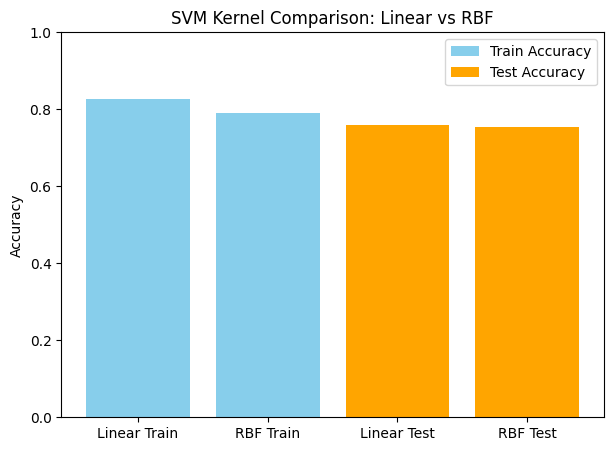

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for both kernels
kernels = ['Linear', 'RBF']
train_accuracies = [0.8257328990228013, 0.789251356238698]
test_accuracies = [0.7597402597402597, 0.7532467532467533]

plt.figure(figsize=(7,5))
plt.bar([k + ' Train' for k in kernels], train_accuracies, color='skyblue', label='Train Accuracy')
plt.bar([k + ' Test' for k in kernels], test_accuracies, color='orange', label='Test Accuracy')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Comparison: Linear vs RBF')
plt.ylim(0, 1)
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()